In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/10k.csv')

In [3]:
grp = df.groupby('year')
impact = grp['impact'].agg('sum')

We can plot the impacts per year.  It looks fairly random!  Some good years, some bad years.

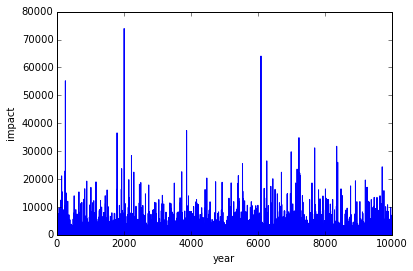

In [13]:
h = plt.plot(impact)
plt.ylabel('impact')
plt.xlabel('year')

A quick way to look at the impacts is with a histogram.  There's a sharp decline; most impacts are relatively small, with a few bad years.

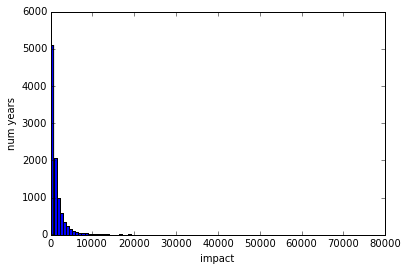

In [14]:
h = plt.hist(impact,bins=100)
plt.xlabel('impact')
plt.ylabel('num years')

We can also ask pandas for a quick quantitative description of impacts by year.

In [12]:
grp['impact'].agg('sum').describe()

count    10000.000000
mean      1507.827120
std       2671.711789
min          0.572000
25%        269.064750
50%        720.495000
75%       1689.947000
max      73932.067000
Name: impact, dtype: float64

In [ ]:
We can calculate a simple empirical CDF using percentiles:

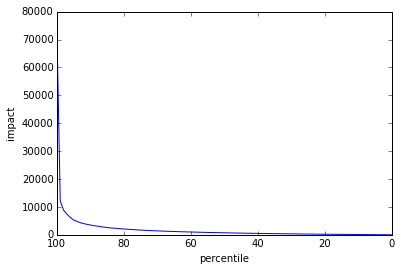

In [31]:
prange = np.arange(100,-1,-1)
tenk_prc = np.percentile(impact,prange)
plt.plot(prange,tenk_prc)
plt.gca().invert_xaxis()
plt.ylabel('impact')
plt.xlabel('percentile')

How well would a 500-year sample do to approximate this?  We can plot one sample:

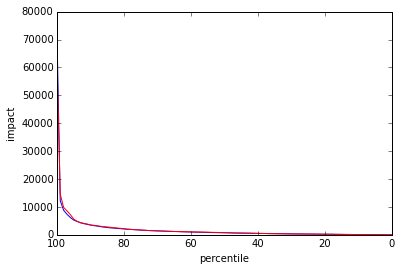

In [32]:
s = impact.sample(500)
plt.plot(prange,tenk_prc)
plt.plot(prange,np.percentile(s,prange),'r')
plt.gca().invert_xaxis()
plt.ylabel('impact')
plt.xlabel('percentile')

By eye, this seems like a reasonably good fit.  However, some (significant?) variation is hiding in the tails!
We can approach this variation by doing a resample.  We'll resample that 500-year sample, 1000 times (with replacement, obviously!).

In [18]:
k = 1000
n = 500

results = np.zeros((k,len(prange)))

for i in range(k):
    s = impact.sample(n)
    results[i,:] = np.percentile(s,prange)

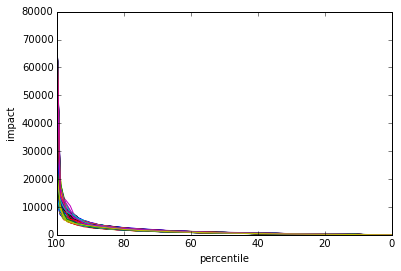

In [19]:
h = plt.plot(prange,results.T)
plt.xlabel('percentile')
plt.ylabel('impact')
plt.gca().invert_xaxis()

Here we can see how much variation is possible.  This really draws the eye to the maximum and minimum.  Again, by eye, most of the variation seems to happen in the middle.  But again, there is varation in the tails!  A log transform helps to bring out this detail.

(0, 5)

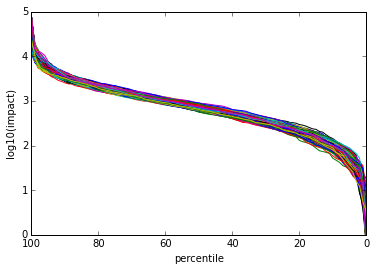

In [33]:
h = plt.plot(prange,np.log10(results.T))
plt.xlabel('percentile')
plt.ylabel('log10(impact)')
plt.gca().invert_xaxis()
plt.ylim((0,5))

Again, the bounds of this are essentially drawn to the max and min.  Describing a confidence interval may be more helpful.

(0, 5)

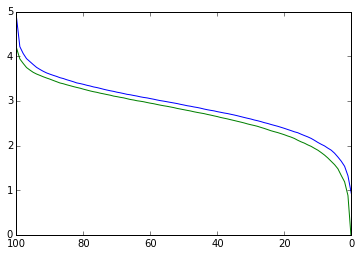

In [28]:
bounds_5 = np.percentile(np.log10(results),5,axis=0)
bounds_95 = np.percentile(np.log10(results),95,axis=0)
plt.plot(prange,bounds_95)
plt.plot(prange,bounds_5)
plt.gca().invert_xaxis()
plt.ylim((0,5))
plt.xlabel('percentile')
plt.ylabel('log10(impact)')

Visualizing that interval as a difference helps illustrate that a signficant amount of variation is happening at the high (near 100 percentile) and especially the low bounds.

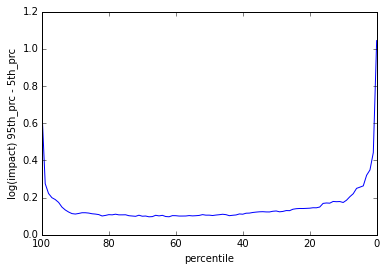

In [29]:
plt.plot(prange,bounds_95 - bounds_5)
plt.gca().invert_xaxis()
plt.ylabel('log(impact) 95th_prc - 5th_prc')
plt.xlabel('percentile')

Another way to approach this would be to calcuate the coefficient of variation.

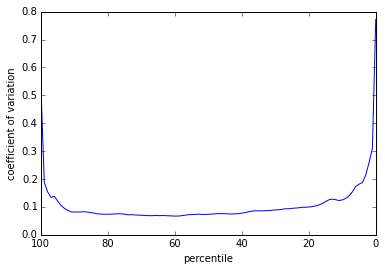

In [30]:
plt.plot(prange,stats.variation(results,axis=0))
plt.gca().invert_xaxis()
plt.ylabel('coefficient of variation')
plt.xlabel('percentile')